In [36]:
import pandas as pd
import numpy as np

o_df= pd.read_csv('dataset/combined.csv',index_col=0)
df=o_df.copy()
# pd.set_option('display.max_rows', None)
df.dtypes


nationality           object
cyclist_id            object
_url                  object
points                 int64
uci_points             int64
length                 int64
startlist_quality      int64
date                  object
position             float64
cyclist_age            int64
is_tarmac               bool
cyclist_team          object
delta                  int64
race_name             object
year                   int64
stage                float64
race_category         object
total_stages           int64
total_racers           int64
w                      int64
cyclist_points       float64
month                  int64
day                    int64
BSA                  float64
aug_profile          float64
dtype: object

In [37]:
cols = [
    "stage",
    "total_stages",
    "race_category",
    "total_racers",
     # "nationality",
    # "cyclist_id",
    # "_url",
    "delta",
    "points",
    "cyclist_points",
    # "uci_points",
    "length",
    "startlist_quality",
    "position",
    "cyclist_age",
    "is_tarmac",
    "cyclist_team",
    # "race_name",
    "year",
    # "stage",
    # "month_sin",
    # "month_cos",
    "month",
    "day",
    "BSA",
    "aug_profile"
]

df=df[cols]

# for col in df.select_dtypes(include=['int64']).columns:
#     df[col] = df[col].astype('int32')

# # Convert float64 to float32
# for col in df.select_dtypes(include=['float64']).columns:
#     df[col] = df[col].astype('float32')

# # Convert object columns to category where applicable
# for col in df.select_dtypes(include=['object']).columns:
#     if df[col].nunique() / len(df[col]) < 0.5:  # Convert to category if there are repeated values
#         df[col] = df[col].astype('category')


# df['is_tarmac'] = df['is_tarmac'].astype(int)

# Display updated dtypes
print(df.dtypes)

stage                float64
total_stages           int64
race_category         object
total_racers           int64
delta                  int64
points                 int64
cyclist_points       float64
length                 int64
startlist_quality      int64
position             float64
cyclist_age            int64
is_tarmac               bool
cyclist_team          object
year                   int64
month                  int64
day                    int64
BSA                  float64
aug_profile          float64
dtype: object


In [38]:
from pycaret.anomaly import *
s = setup(df, 
          normalize=True,
          # use_gpu=True,
          session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(418612, 18)"
2,Transformed data shape,"(418612, 111)"
3,Numeric features,15
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [39]:
model = create_model('iforest',
                     fraction=.02
                    )


In [40]:
dft = assign_model(model)
dft.drop("Anomaly",axis=1, inplace=True)


<Axes: >

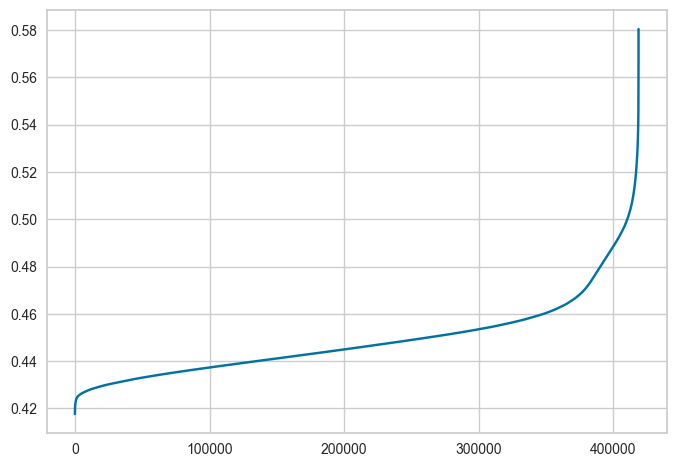

In [41]:
import seaborn
from scipy.spatial.distance import pdist, squareform


sorted_outlier_degrees = sorted(dft['Anomaly_Score']+0.5)


seaborn.lineplot(
    x=range(dft.shape[0]),
    y=sorted_outlier_degrees
)

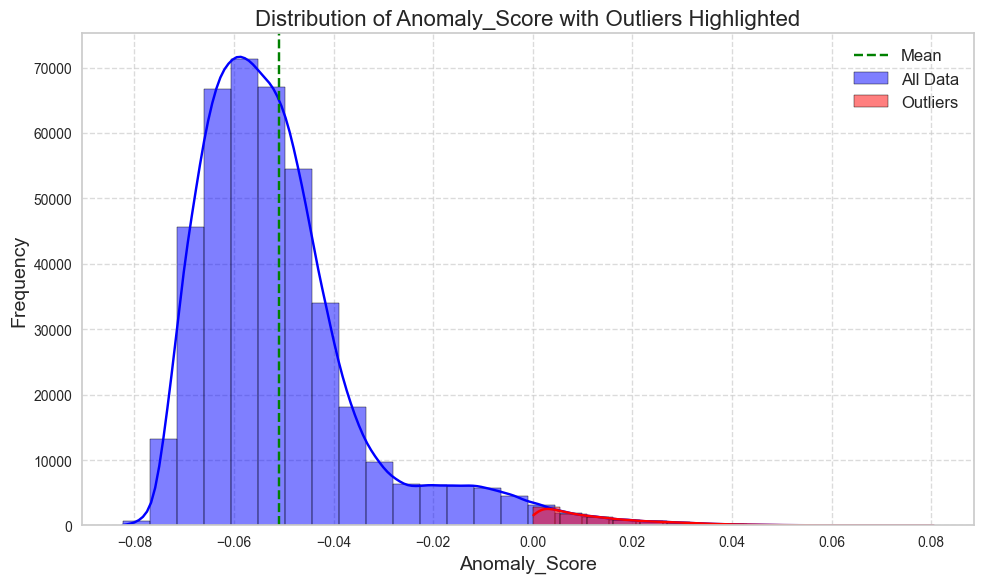

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate mean and standard deviation
mean = dft['Anomaly_Score'].mean()
std_dev = dft['Anomaly_Score'].std()

# Calculate Z-scores
z_scores = (dft['Anomaly_Score'] - mean) / std_dev

# Filter rows with Z-scores greater than 3 (outliers)
outliers = dft[np.abs(z_scores) > 3]

# Plot the distribution of Anomaly_Score
plt.figure(figsize=(10, 6))
sns.histplot(dft['Anomaly_Score'], kde=True, color='blue', bins=30, label='All Data')
sns.histplot(outliers['Anomaly_Score'], kde=True, color='red', bins=15, label='Outliers')

# Add titles and labels
plt.title('Distribution of Anomaly_Score with Outliers Highlighted', fontsize=16)
plt.xlabel('Anomaly_Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(mean, color='green', linestyle='--', label='Mean')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [43]:
df=o_df.loc[dft[dft['Anomaly_Score']+0.5 <0.49].index]
df.shape

(401474, 25)

In [12]:
o_df.loc[dft[np.abs(z_scores) < 3].index].to_csv("dataset/combined_outlier.csv")
o_df.loc[dft[np.abs(z_scores) < 3].index].shape

(405183, 23)

In [28]:
o_df.loc[dft[dft['Anomaly_Score']+0.5 <0.49].index]["race_name"].value_counts().shape

(27,)

In [24]:
from utils2 import remove_outliers_zscore
remove_outliers_zscore(r,3.5).to_csv("dataset/combined_outlier.csv")

In [44]:
# Count number of cyclist_id for each _url
cyclist_counts = df.groupby('_url')['cyclist_id'].count().reset_index(name='cyclist_count')

    # Merge cyclist counts back to the original dataframe
df = df.merge(cyclist_counts, on='_url')

    # Drop rows where cyclist_count is less than half of total_racers
df = df[df['cyclist_count'] >= df['total_racers'] / 2]
df.shape

(396687, 26)

In [31]:
df["race_name"].value_counts()

race_name
tour-de-france            100007
vuelta-a-espana            94325
giro-d-italia              82394
tirreno-adriatico          21231
paris-nice                 19151
volta-a-catalunya          17739
dauphine                   14504
tour-de-suisse             13484
itzulia-basque-country      9947
tour-de-romandie            8410
uae-tour                    4089
la-fleche-wallone           2060
san-sebastian               1934
omloop-het-nieuwsblad       1263
gp-quebec                    986
dwars-door-vlaanderen        876
gran-camino                  785
e3-harelbeke                 698
amstel-gold-race             685
gp-montreal                  648
strade-bianche               370
il-lombardia                 291
world-championship           263
liege-bastogne-liege         231
ronde-van-vlaanderen         132
paris-roubaix                108
milano-sanremo                76
Name: count, dtype: int64

In [45]:
# df[races['race_name'] = 'milano-sanremo']  
df=df[df['race_name'] != 'milano-sanremo'] 


In [46]:
df.to_csv("dataset/combined_outlier.csv")

In [47]:
df.columns

Index(['nationality', 'cyclist_id', '_url', 'points', 'uci_points', 'length',
       'startlist_quality', 'date', 'position', 'cyclist_age', 'is_tarmac',
       'cyclist_team', 'delta', 'race_name', 'year', 'stage', 'race_category',
       'total_stages', 'total_racers', 'w', 'cyclist_points', 'month', 'day',
       'BSA', 'aug_profile', 'cyclist_count'],
      dtype='object')

## Other methods 

In [47]:
model = create_model('cluster')


In [ ]:
plot_model(model,'umap')

In [31]:
dft = assign_model(model)
dft

,stage,total_stages,race_category,total_racers,delta,points,uci_points,length,startlist_quality,position,cyclist_age,is_tarmac,cyclist_team,year,month,day,BSA,aug_profile,Anomaly,Anomaly_Score
0,0.095238,21,grand_tour,196,0,100,0,262000,1994,0.673469,32,True,denmark-1991,1997,7,7,229.541489,0.945817,0,-0.070120
1,0.300000,20,grand_tour,184,65,100,0,196500,2047,0.190217,27,True,france-1978,1992,7,11,229.541489,0.733865,0,-0.059654
3,0.523810,21,grand_tour,181,415,100,0,192000,1933,0.055249,26,True,norway-1987,1991,7,18,229.541489,1.862417,0,-0.061096
4,0.238095,21,grand_tour,192,204,100,0,261300,1994,0.562500,32,True,denmark-1991,1997,7,10,229.541489,0.787517,0,-0.073036
5,0.700000,20,grand_tour,133,80,100,0,198000,2047,0.218045,27,True,france-1978,1992,7,20,229.541489,1.107038,0,-0.057706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502007,1.000000,1,monument,107,287,275,500,257200,747,0.299065,23,False,canada-1996,2022,4,17,235.928452,0.561753,0,-0.008182
502008,1.000000,1,classic,108,252,225,300,183700,648,0.444444,23,False,canada-1996,2022,3,30,235.928452,0.837981,0,-0.025055
502009,1.000000,1,classic,101,506,225,400,204100,860,0.613861,24,False,sport-vlaanderen-baloise-2021,2023,3,24,235.928452,0.935724,0,-0.011257
502010,1.000000,1,classic,125,407,225,300,207300,677,0.680000,24,False,sport-vlaanderen-baloise-2021,2023,2,25,235.928452,0.829216,0,-0.013799


In [21]:
o_df

,nationality,cyclist_id,_url,points,uci_points,length,startlist_quality,date,position,cyclist_age,...,race_name,year,stage,race_category,total_stages,total_racers,month,day,BSA,aug_profile
0,France,gerard-rue,tour-de-france/1997/stage-2,100,0,262000,1994,1997-07-07 06:27:47,0.673469,32,...,tour-de-france,1997,0.136364,grand_tour,22,196,7,7,229.541488,0.946015
1,France,gerard-rue,tour-de-france/1992/stage-7,100,0,196500,2047,1992-07-11 04:22:52,0.190217,27,...,tour-de-france,1992,0.333333,grand_tour,21,184,7,11,229.541488,0.734006
3,France,gerard-rue,tour-de-france/1991/stage-12,100,0,192000,1933,1991-07-18 05:22:47,0.055249,26,...,tour-de-france,1991,0.545455,grand_tour,22,181,7,18,229.541488,1.862699
4,France,gerard-rue,tour-de-france/1997/stage-5,100,0,261300,1994,1997-07-10 06:20:08,0.562500,32,...,tour-de-france,1997,0.272727,grand_tour,22,192,7,10,229.541488,0.787673
5,France,gerard-rue,tour-de-france/1992/stage-15,100,0,198000,2047,1992-07-20 04:45:19,0.218045,27,...,tour-de-france,1992,0.714286,grand_tour,21,133,7,20,229.541488,1.107226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516223,Belgium,ward-vanhoof,paris-roubaix/2022/result,275,500,257200,747,2022-04-17 05:41:47,0.299065,23,...,paris-roubaix,2022,1.000000,monument,1,107,4,17,235.928445,0.561849
516224,Belgium,ward-vanhoof,dwars-door-vlaanderen/2022/result,225,300,183700,648,2022-03-30 04:09:51,0.444444,23,...,dwars-door-vlaanderen,2022,1.000000,classic,1,108,3,30,235.928445,0.838098
516225,Belgium,ward-vanhoof,e3-harelbeke/2023/result,225,400,204100,860,2023-03-24 04:53:25,0.613861,24,...,e3-harelbeke,2023,1.000000,classic,1,101,3,24,235.928445,0.935866
516226,Belgium,ward-vanhoof,omloop-het-nieuwsblad/2023/result,225,300,207300,677,2023-02-25 05:01:36,0.680000,24,...,omloop-het-nieuwsblad,2023,1.000000,classic,1,125,2,25,235.928445,0.829330


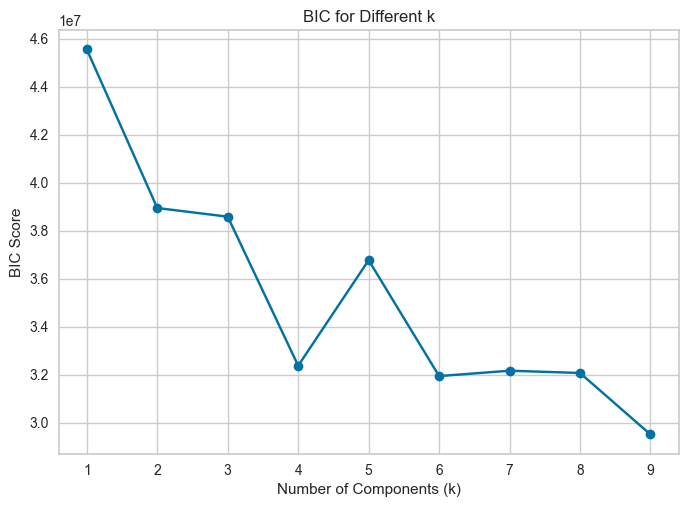

In [16]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

bics = []
ks = range(1, 10)

for k in ks:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df.values)
    bics.append(gmm.bic(df.values))

plt.plot(ks, bics, marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('BIC Score')
plt.title('BIC for Different k')
plt.show()


In [17]:
from sklearn.mixture import GaussianMixture
import numpy
import seaborn


k = 4
algorithm = GaussianMixture(n_components=k)
algorithm.fit(df.values)

outlier_degrees_per_normal = algorithm.predict_proba(df.values)
outlier_degrees = outlier_degrees_per_normal.max(axis=1)

df3=df.copy()
df3.loc[:, "density_degree"] = outlier_degrees
df3

,points,uci_points,length,startlist_quality,position,cyclist_age,is_tarmac,year,month_sin,month_cos,person_size,aug_profile,density_degree
0,80,0,20100,803,110,25,True,1989,0.866025,-5.000000e-01,109.812750,1.084313,1.0
1,100,0,262000,1994,132,32,True,1997,-0.500000,-8.660254e-01,116.051713,1.402638,1.0
2,100,0,138500,1959,66,25,True,1990,-0.500000,-8.660254e-01,116.051713,1.176656,1.0
3,100,0,196500,2047,35,27,True,1992,-0.500000,-8.660254e-01,116.051713,1.288213,1.0
4,100,0,196000,1959,41,25,True,1990,-0.500000,-8.660254e-01,116.051713,2.341411,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474736,275,500,257200,747,32,23,False,2022,0.866025,-5.000000e-01,118.110118,1.195297,1.0
474737,225,300,183700,648,48,23,False,2022,1.000000,6.123234e-17,118.110118,2.236450,1.0
474738,225,400,204100,860,62,24,False,2023,1.000000,6.123234e-17,118.110118,2.289217,1.0
474739,225,300,207300,677,85,24,False,2023,0.866025,5.000000e-01,118.110118,2.231718,1.0


<Axes: >

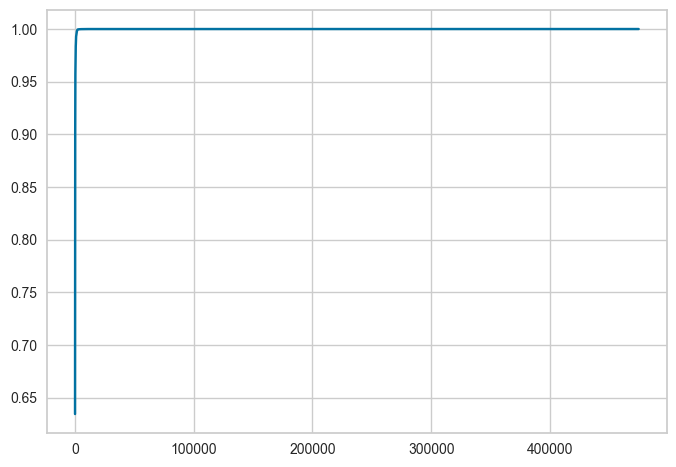

In [18]:
sorted_outlier_degrees = sorted(outlier_degrees)
outlier_degrees_cdf = numpy.cumsum(sorted_outlier_degrees)

seaborn.lineplot(
    x=range(df3.shape[0]),
    y=sorted_outlier_degrees
)

In [30]:
mean = df3['density_degree'].mean()
std_dev = df3['density_degree'].std()
z_scores = (df3['density_degree'] - mean) / std_dev
df3[np.abs(z_scores) > 2]


,points,uci_points,length,startlist_quality,position,cyclist_age,is_tarmac,year,month_sin,month_cos,person_size,aug_profile,density_degree
509,80,16,59400,861,18,27,True,2015,5.000000e-01,-8.660254e-01,116.861029,3.085030,0.991485
917,80,16,85000,1123,106,30,True,2010,-1.000000e+00,-1.836970e-16,102.469508,1.107542,0.894351
1824,100,0,100000,1241,46,27,True,1978,1.224647e-16,-1.000000e+00,101.646446,1.057069,0.949966
1868,100,0,97000,1362,14,30,True,1981,1.224647e-16,-1.000000e+00,101.646446,2.286779,0.965109
2507,80,0,60600,975,136,29,True,2009,5.000000e-01,-8.660254e-01,113.798067,2.214654,0.991217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471804,80,0,60600,975,134,30,True,2009,5.000000e-01,-8.660254e-01,114.917362,2.214654,0.991073
472728,100,0,97000,1362,142,26,True,1981,1.224647e-16,-1.000000e+00,113.539732,2.286779,0.958157
473323,80,0,94400,1342,107,28,True,1999,-1.000000e+00,-1.836970e-16,103.566404,2.256094,0.983755
473508,80,0,94400,1342,64,34,True,1999,-1.000000e+00,-1.836970e-16,109.812750,2.256094,0.983289


In [26]:
df3[df3['density_degree'] < 0.995]

,points,uci_points,length,startlist_quality,position,cyclist_age,is_tarmac,year,month_sin,month_cos,person_size,aug_profile,density_degree
509,80,16,59400,861,18,27,True,2015,5.000000e-01,-8.660254e-01,116.861029,3.085030,0.991485
917,80,16,85000,1123,106,30,True,2010,-1.000000e+00,-1.836970e-16,102.469508,1.107542,0.894351
1824,100,0,100000,1241,46,27,True,1978,1.224647e-16,-1.000000e+00,101.646446,1.057069,0.949966
1868,100,0,97000,1362,14,30,True,1981,1.224647e-16,-1.000000e+00,101.646446,2.286779,0.965109
2507,80,0,60600,975,136,29,True,2009,5.000000e-01,-8.660254e-01,113.798067,2.214654,0.991217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472560,80,180,74600,835,17,30,True,2023,5.000000e-01,-8.660254e-01,103.344085,5.352165,0.994362
472728,100,0,97000,1362,142,26,True,1981,1.224647e-16,-1.000000e+00,113.539732,2.286779,0.958157
473323,80,0,94400,1342,107,28,True,1999,-1.000000e+00,-1.836970e-16,103.566404,2.256094,0.983755
473508,80,0,94400,1342,64,34,True,1999,-1.000000e+00,-1.836970e-16,109.812750,2.256094,0.983289
